In [ ]:
import numpy as np 
import pandas as pd 
import folium
import plotly.express as plt
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import load, dump
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

: 

In [116]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline
init_notebook_mode(connected= True)




#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


# dimensionality reduction
from sklearn.decomposition import PCA
from umap import UMAP
import pylab as pl

# imbalance dataset handling

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)




# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [110]:
!pip install -U scikit-learn
!pip install pandas
!pip install joblib


^C
^C
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/opt/conda/bin/pip", line 6, in <module>
    from pip._internal.cli.main import main
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/opt/conda/lib/

In [143]:
!pip install Flask

In [117]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data = data.dropna()
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


**GRAFICS**

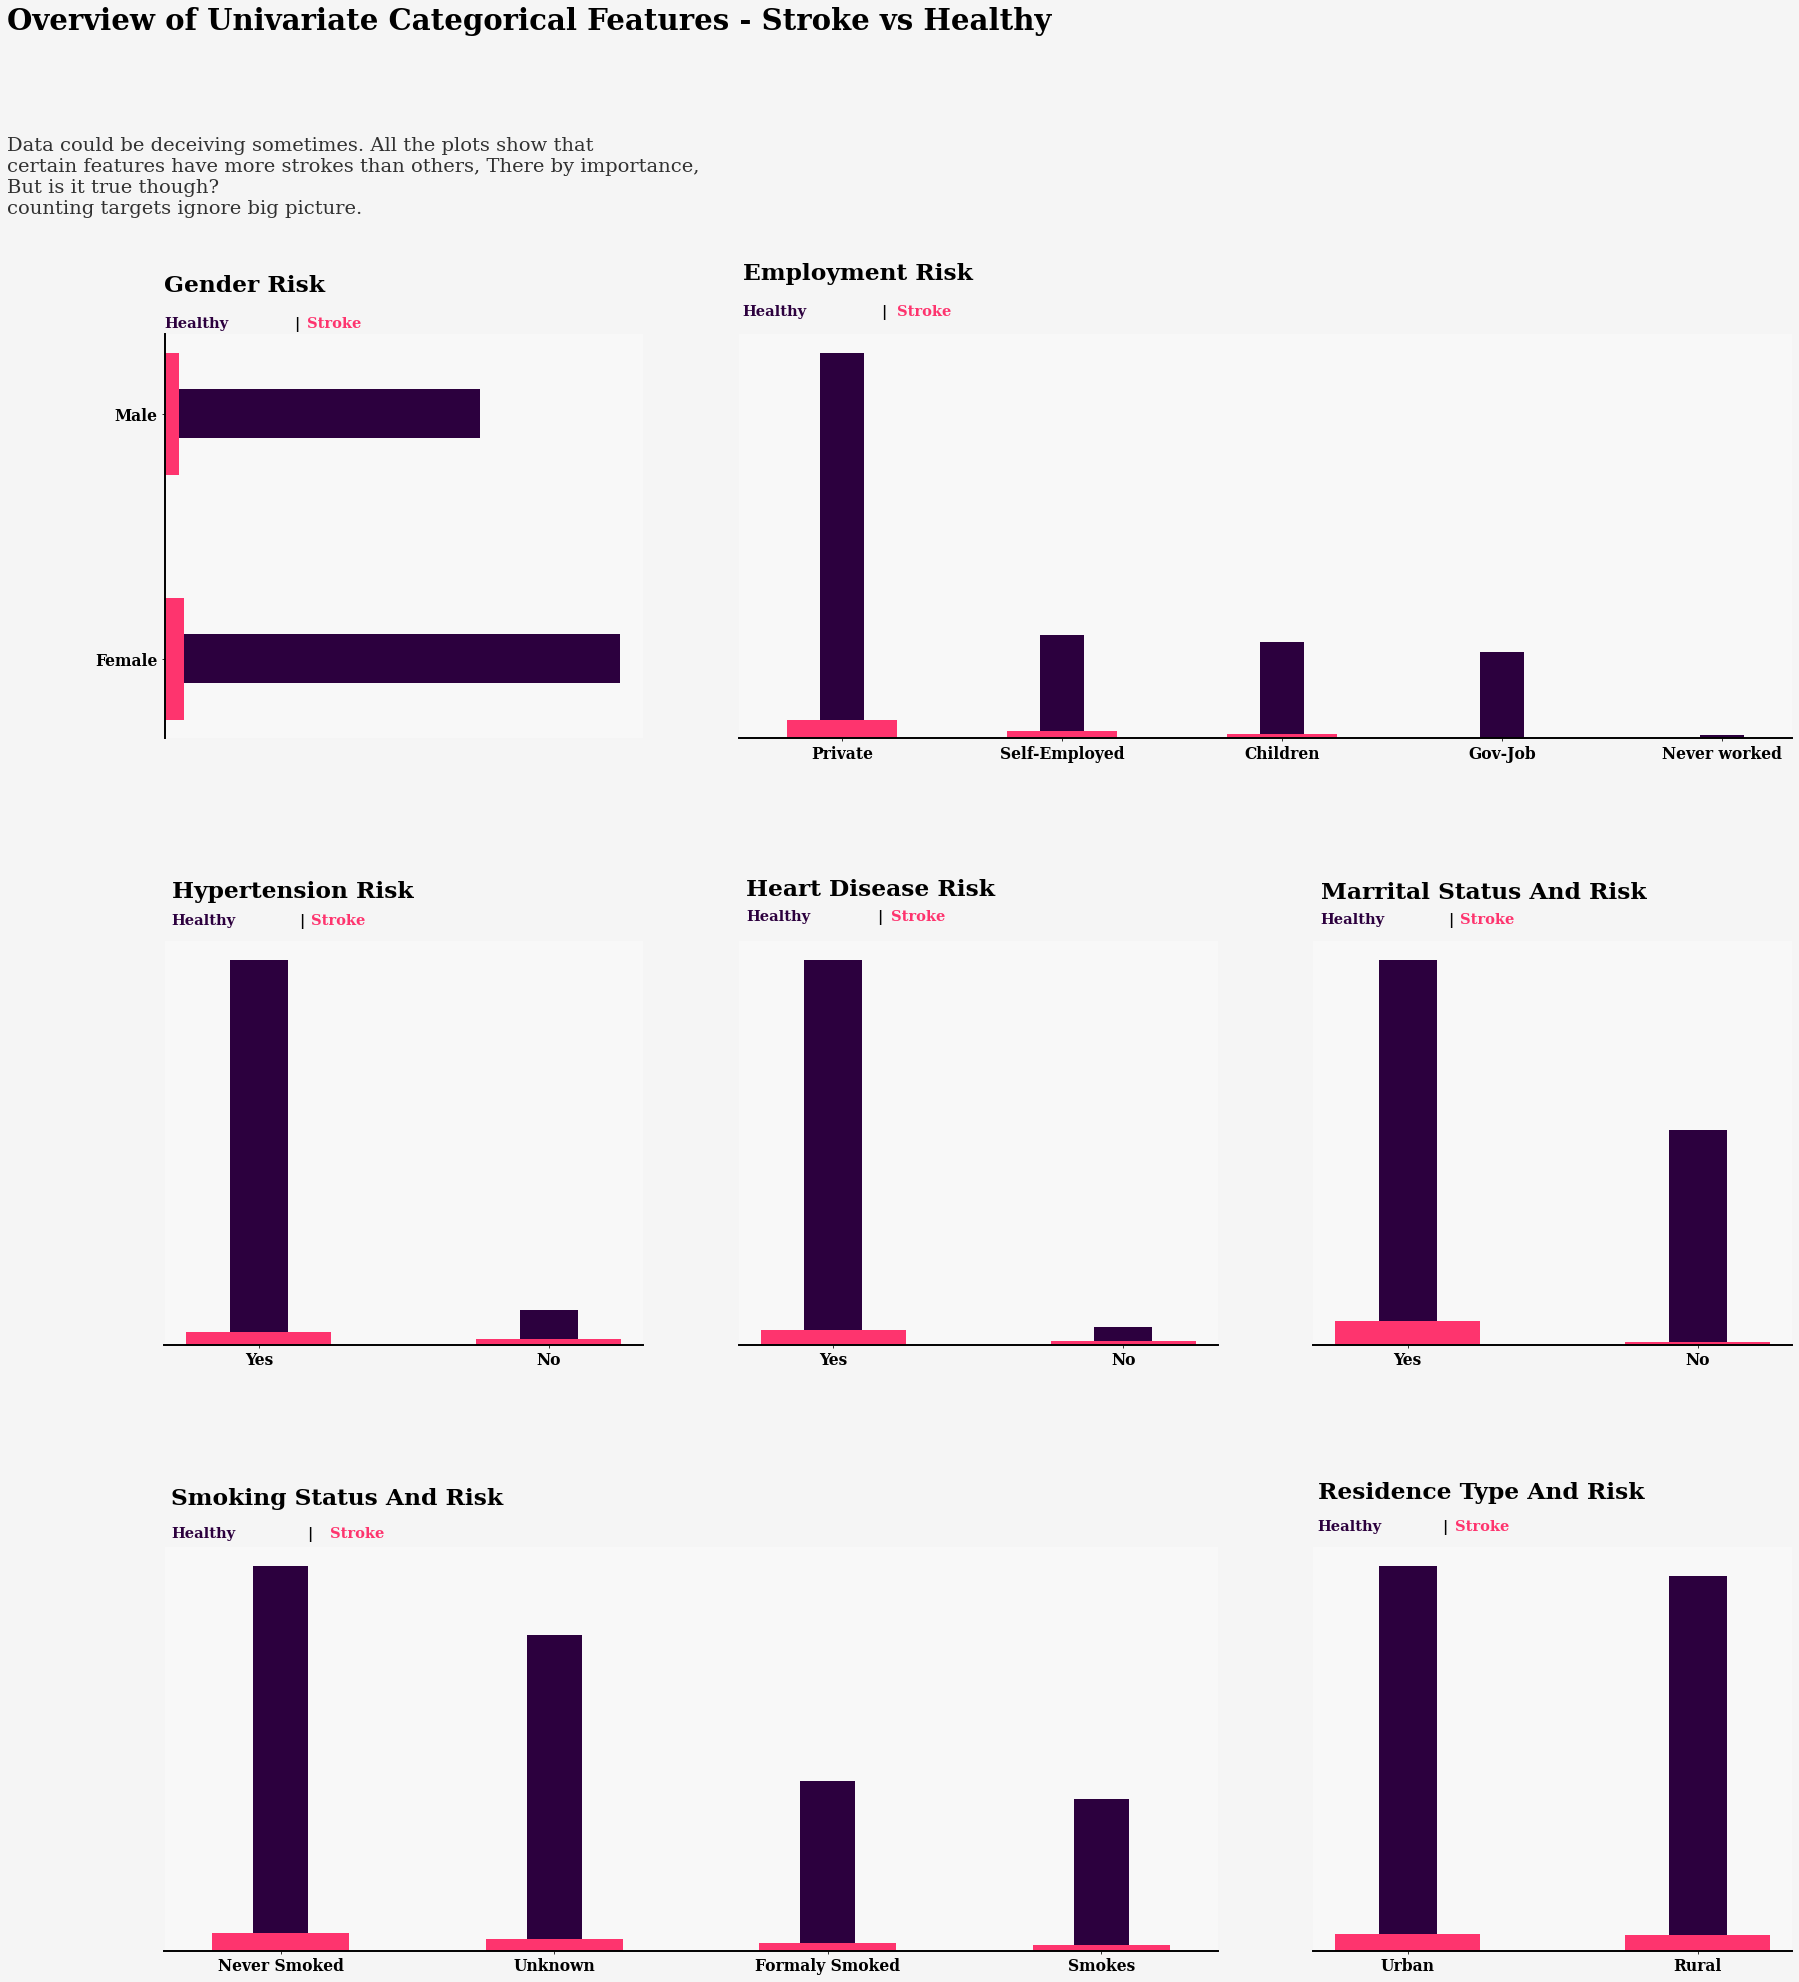

In [118]:
fig = plt.figure(figsize = (30,30),dpi = 70)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0:2])
ax7 = fig.add_subplot(gs[2,2])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# Ax1: Gender- stroke distributions
healthy_gen = data[data['stroke'] == 0].gender.value_counts()
stroke_gen = data[data['stroke'] == 1].gender.value_counts()

ax1.barh( stroke_gen.index , width = healthy_gen.values[0:2], height = 0.2, color = healthy_col)
ax1.barh( np.arange(len(stroke_gen.index)) , width = stroke_gen.values, height = 0.5, color = stroke_col)
ax1.set_yticklabels(stroke_gen.index, **font_dict)

ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.text(0,1.5, 'Gender Risk',**title_args)
ax1.text(0,1.35, 'Healthy',**health_dict)
ax1.text(790,1.35, '|',**dash_dict)
ax1.text(870,1.35, 'Stroke',**stroke_dict)

# Ax2: work type - stroke distributions
healthy_gen = data[data['stroke'] == 0].work_type.value_counts()
stroke_gen = data[data['stroke'] == 1].work_type.value_counts()

ax2.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2, color = healthy_col)
ax2.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5, color= stroke_col)
ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)


ax2.text(-0.45,3200, 'Employment Risk',**title_args)
ax2.text(-0.45,2950, 'Healthy',**health_dict)
ax2.text(0.18,2950, '|',**dash_dict)
ax2.text(0.25,2950, 'Stroke',**stroke_dict)

# Ax3: hypertension - stroke distributions

healthy_gen = data[data['stroke'] == 0].hypertension.value_counts()
stroke_gen = data[data['stroke'] == 1].hypertension.value_counts()

ax3.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax3.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax3.set_xticklabels(['Yes','No'], **font_dict)

ax3.text(-0.3,5000, 'Hypertension Risk',**title_args)
ax3.text(-0.3,4700, 'Healthy',**health_dict)
ax3.text(0.14,4700, '|',**dash_dict)
ax3.text(0.18,4700, 'Stroke',**stroke_dict)


# Ax4: Heart Disease - stroke distributions

healthy_gen = data[data['stroke'] == 0].heart_disease.value_counts()
stroke_gen = data[data['stroke'] == 1].heart_disease.value_counts()

ax4.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax4.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax4.set_xticklabels(['Yes', 'No'],**font_dict)

ax4.text(-0.3,5250, 'Heart Disease Risk',**title_args)
ax4.text(-0.3,4950, 'Healthy',**health_dict)
ax4.text(0.15,4950, '|',**dash_dict)
ax4.text(0.20,4950, 'Stroke',**stroke_dict)


# Ax5: Married - stroke distributions
healthy_gen = data[data['stroke'] == 0].ever_married.value_counts()
stroke_gen = data[data['stroke'] == 1].ever_married.value_counts()

ax5.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax5.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col )
ax5.set_xticklabels(healthy_gen.index, **font_dict)

ax5.text(-0.3,3500, 'Marrital Status And Risk',**title_args)
ax5.text(-0.3,3300, 'Healthy',**health_dict)
ax5.text(0.14,3300, '|',**dash_dict)
ax5.text(0.18,3300, 'Stroke',**stroke_dict)




# Ax6: Smoking status - stroke distributions

healthy_gen = data[data['stroke'] == 0].smoking_status.value_counts()
stroke_gen = data[data['stroke'] == 1].smoking_status.value_counts()

ax6.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = healthy_col)
ax6.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax6.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)

ax6.text(-0.4,2050, 'Smoking Status And Risk',**title_args)
ax6.text(-0.4,1900, 'Healthy',**health_dict)
ax6.text(0.095,1900, '|',**dash_dict)
ax6.text(0.18,1900, 'Stroke',**stroke_dict)




# Ax7: Residence type - stroke distributions

healthy_gen = data[data['stroke'] == 0].Residence_type.value_counts()
stroke_gen = data[data['stroke'] == 1].Residence_type.value_counts()

ax7.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax7.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax7.set_xticklabels(healthy_gen.index, **font_dict)

ax7.text(-0.31,2800, 'Residence Type And Risk',**title_args)
ax7.text(-0.31,2600, 'Healthy',**health_dict)
ax7.text(0.12,2600,'|',**dash_dict)
ax7.text(0.165,2600, 'Stroke',**stroke_dict)

fig.text(0.05,1.025, 'Overview of Univariate Categorical Features - Stroke vs Healthy', {'font':'Serif', 'color':'black','size':30, 'weight':'bold'})
fig.text(0.05,0.9375,'Data could be deceiving sometimes. All the plots show that\ncertain features have more strokes than others, There by importance, \nBut is it true though? \ncounting targets ignore big picture.',{'font':'Serif', 'color':'black','size':20, 'weight':'normal'}, alpha = 0.8)

fig.show()

In [119]:
X = data.drop(["id", "stroke"], axis=1) 
Y = data["stroke"]

In [120]:
le = LabelEncoder()

leList = ['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status']

for col in leList:
  X[col] = le.fit_transform(X[col])

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=520)

In [122]:
model = DecisionTreeClassifier(max_depth=120, min_samples_split=120)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=120, min_samples_split=120)

In [123]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

array([[936,   0],
       [ 46,   0]])

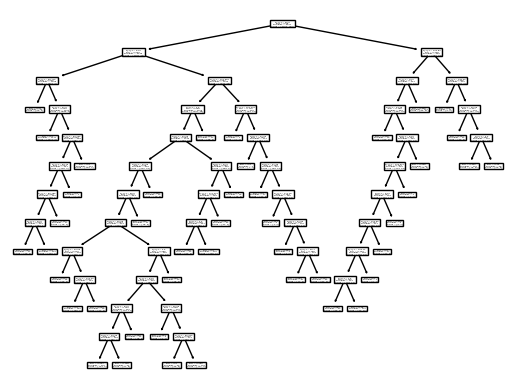

In [124]:
plot_tree(model)
confusion_matrix(Y_test, Y_pred)

In [125]:
print(accuracy)

0.9531568228105907


In [126]:
models = {
    "Decision Tree": DecisionTreeClassifier(
        min_samples_split=120,
        max_depth=120
    ),
    "Support Vector Machine" : SVC(),
    "K-nearest Neighbors" : KNeighborsClassifier(
        n_neighbors=3  #kmeans
    ),
    "Random Forest" : RandomForestClassifier(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Ensemble Boosting" : HistGradientBoostingClassifier(),
    "Ensemble Bagging" : BaggingClassifier(SVC(),
        max_samples=0.5, max_features=0.5
    )
}

In [127]:
for key in models:
    model = models[key]
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    score = accuracy_score(Y_pred, Y_test)
    print(f"{key}")
    print(f"score: {score}")

    Y_pred = model.predict(X_train)
    score = accuracy_score(Y_pred, Y_train)
    print(f"score dados treino: {score}")
    
    print("\n")

Decision Tree
score: 0.9531568228105907
score dados treino: 0.9592564298446652


Support Vector Machine
score: 0.9531568228105907
score dados treino: 0.9584924879042526


K-nearest Neighbors
score: 0.9460285132382892
score dados treino: 0.9646040234275528


Random Forest
score: 0.9521384928716904
score dados treino: 1.0


Gaussian Naive Bayes
score: 0.8716904276985743
score dados treino: 0.873694932518462


Ensemble Boosting
score: 0.9490835030549898
score dados treino: 0.9971988795518207


Ensemble Bagging
score: 0.9531568228105907
score dados treino: 0.9584924879042526




**FLASK**

In [128]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [130]:
prediction = model.predict([[1, 67, 0, 1, 1, 2, 1, 228.69, 36.6, 1]])

In [131]:
def prediction(inputData):
    prediction = model.predict([inputData])

    if(prediction == 0):
        return "Not Stroke"
    elif(prediction == 1):
        return "Stroke"

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/prediction', methods=['POST'])
def predictionPost():
    data = request.json
    return prediction(data.get('data'))


app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


In [138]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/prediction', methods=['GET'])
def predictionPost():
    return "sasa"

app.run(host="0.0.0.0", port=8080)


 * Serving Flask app '__main__'
 * Debug mode: off
